# City Size Distribuion

This notebook contains analysis and visualizations for:

1. Investigating the distribution of sizes of African cities, towns, and villages.
2. Determining how these distributions have changed over the period 2000-2020.
3. Examining the trajectoris of individuals cities or groups of cities

In [82]:
# Read in the data.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

working_directory = "../../temp_data/"

In [110]:
def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

## 2000 World Pop Data

In [123]:
data_file = '20181116_WP2000_pops.csv'
variable = 'Wpop2000'
year = 2000

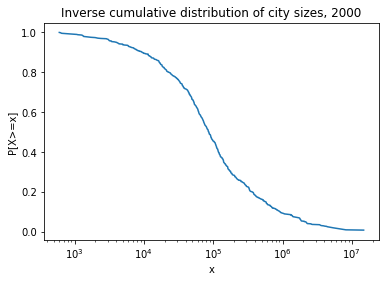

In [124]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)
df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot for 2000
data_2000 = df[variable].sort_values()
X, y = p_X_gt_x(data_2000)

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

# 2020 World Pop Data

In [116]:
data_file = '20181116_WP2020_pops.csv'
variable = 'Wpop2000' # Note this is an error that needs to be fixed
year = 2020

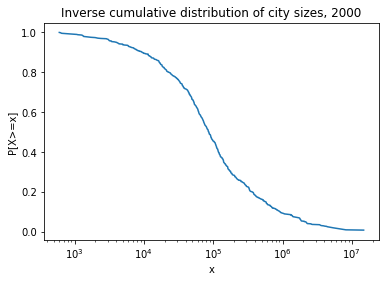

In [125]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)

df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot
data_2020 = df[variable].sort_values()
X, y = p_X_gt_x(data_2020)

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

## Change detection in inverse cdfs

[100.0, 177.82794100389228, 316.22776601683796, 562.341325190349, 1000.0, 1778.2794100389228, 3162.2776601683795, 5623.413251903491, 10000.0, 17782.794100389227, 31622.776601683792, 56234.13251903491, 100000.0, 177827.94100389228, 316227.7660168379, 562341.3251903491, 1000000.0, 1778279.410038923, 3162277.6601683795, 5623413.251903491, 10000000.0, 17782794.100389227, 31622776.60168379, 56234132.51903491]
460    0.0
603    0.0
451    0.0
147    0.0
182    0.0
255    0.0
308    0.0
461    0.0
458    0.0
455    0.0
188    0.0
321    0.0
485    0.0
659    0.0
456    0.0
523    0.0
334    0.0
111    0.0
330    0.0
606    0.0
459    0.0
457    0.0
254    0.0
178    0.0
176    0.0
50     0.0
329    0.0
88     0.0
290    0.0
453    0.0
      ... 
687    0.0
682    0.0
494    0.0
501    0.0
190    0.0
665    0.0
12     0.0
7      0.0
32     0.0
216    0.0
397    0.0
121    0.0
53     0.0
680    0.0
677    0.0
674    0.0
463    0.0
515    0.0
495    0.0
507    0.0
508    0.0
509    0.0
510    0.

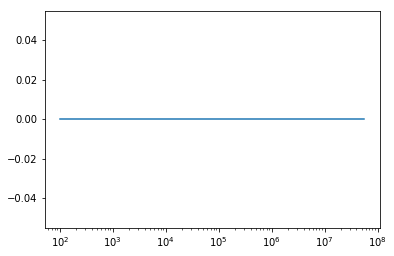

In [126]:
from math import log10, floor, ceil

max_data = ceil(log10(max(max(data_2020),max(data_2000))))  # Find the minimum log scale in the data
min_data = floor(log10(min(min(data_2020),min(data_2000)))) # Find the maximum log scale in the data

values = [pow(10,x) for x in np.arange(min_data,max_data,0.25)] # Generate a list of values for the inverse cdf.

print(values)

X, y1 = p_X_gt_x(data_2000, X=values)
X, y2 = p_X_gt_x(data_2020, X=values)

plt.plot(X,y2-y1)
plt.xscale('log')

print(data_2000 - data_2020)